In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

In [2]:
import fastai
from fastai.data.transforms import RandomSplitter

from fastai.vision.all import *

from pathlib import Path
import torch

In [3]:
torch.__version__

'2.0.0+cu118'

In [4]:
fastai.__version__

'2.7.12'

In [5]:
#!unzip '/content/drive/MyDrive/flowers.zip' -d '/content/drive/MyDrive/Untitled Folder'



In [6]:
data_path = Path('/content/drive/MyDrive/Untitled Folder/flowers')


In [7]:
data_path.ls()

(#5) [Path('/content/drive/MyDrive/Untitled Folder/flowers/daisy'),Path('/content/drive/MyDrive/Untitled Folder/flowers/dandelion'),Path('/content/drive/MyDrive/Untitled Folder/flowers/rose'),Path('/content/drive/MyDrive/Untitled Folder/flowers/sunflower'),Path('/content/drive/MyDrive/Untitled Folder/flowers/tulip')]

In [8]:
tfms_item = RandomResizedCrop(128,min_scale=0.35)
tfms_batch = [Normalize.from_stats(*imagenet_stats)]

In [9]:
data = ImageDataLoaders.from_folder(data_path,item_tfms=tfms_item,
                                    batch_tfms = tfms_batch,
                                    valid_pct = 0.15, shuffle = True, device = torch.device('cuda'))

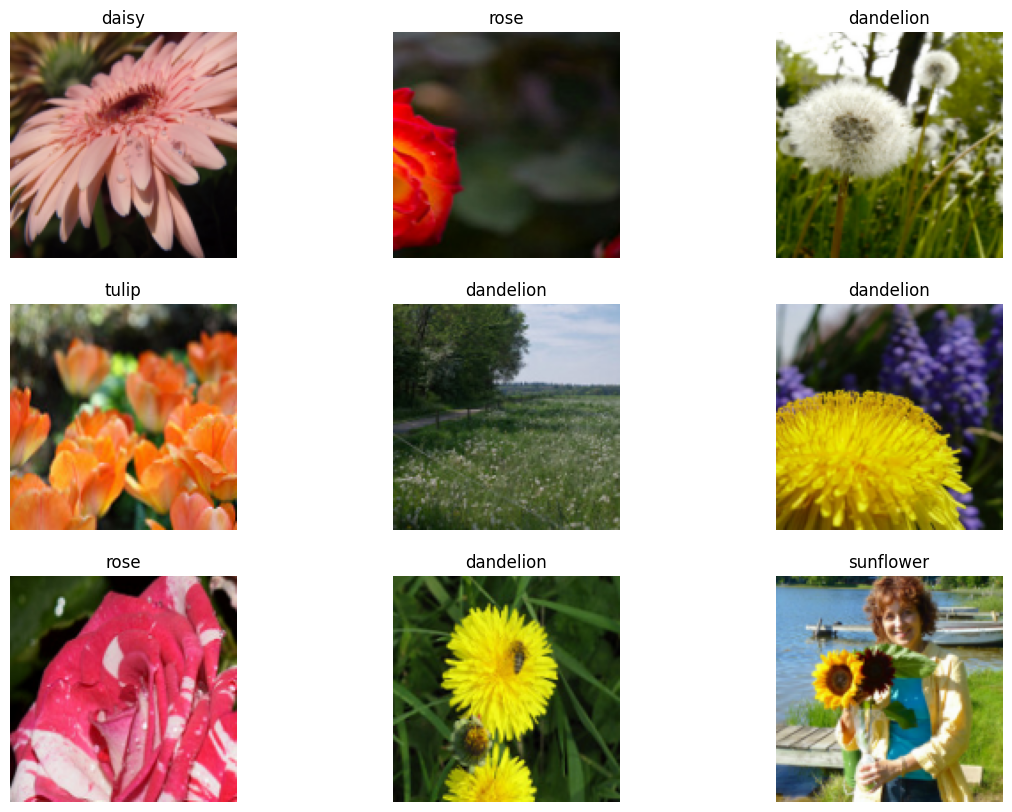

In [10]:
data.show_batch(figsize = (14,10))

In [11]:
print('Number of classes',data.c)

Number of classes 5


In [12]:
model = cnn_learner(data, resnet50, metrics = accuracy, model_dir = '/tmp/model')

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
model.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 32 x 32  
Conv2d                                    16384      False     
BatchNorm2d                        

SuggestedLRs(valley=0.0010000000474974513)

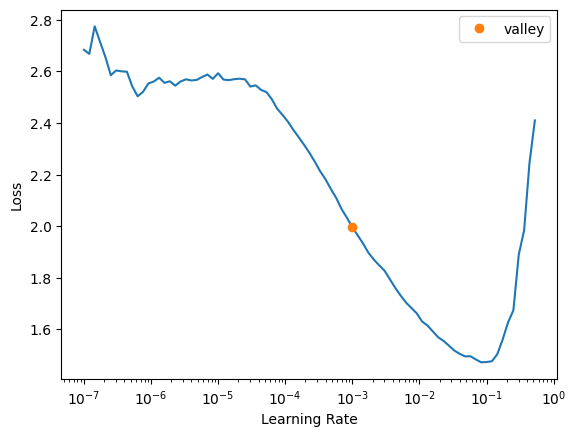

In [14]:
model.lr_find()

In [16]:
model.fit_one_cycle(5,0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.553095,0.419303,0.879630,00:26
1,0.498020,0.345812,0.896605,00:24
2,0.380654,0.336112,0.902778,00:26
3,0.293572,0.321098,0.899691,00:25
4,0.237667,0.307761,0.907407,00:25


In [17]:
model.save('Python_D2_W11_HW.pkl')

Path('/tmp/model/Python_D2_W11_HW.pkl.pth')

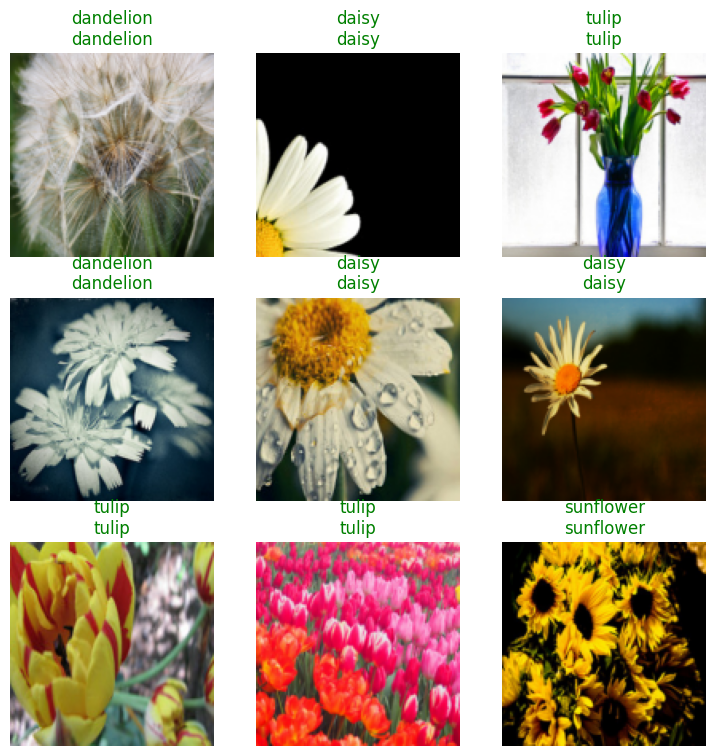

In [18]:
model.show_results()

In [20]:
interpretation = ClassificationInterpretation.from_learner(model)

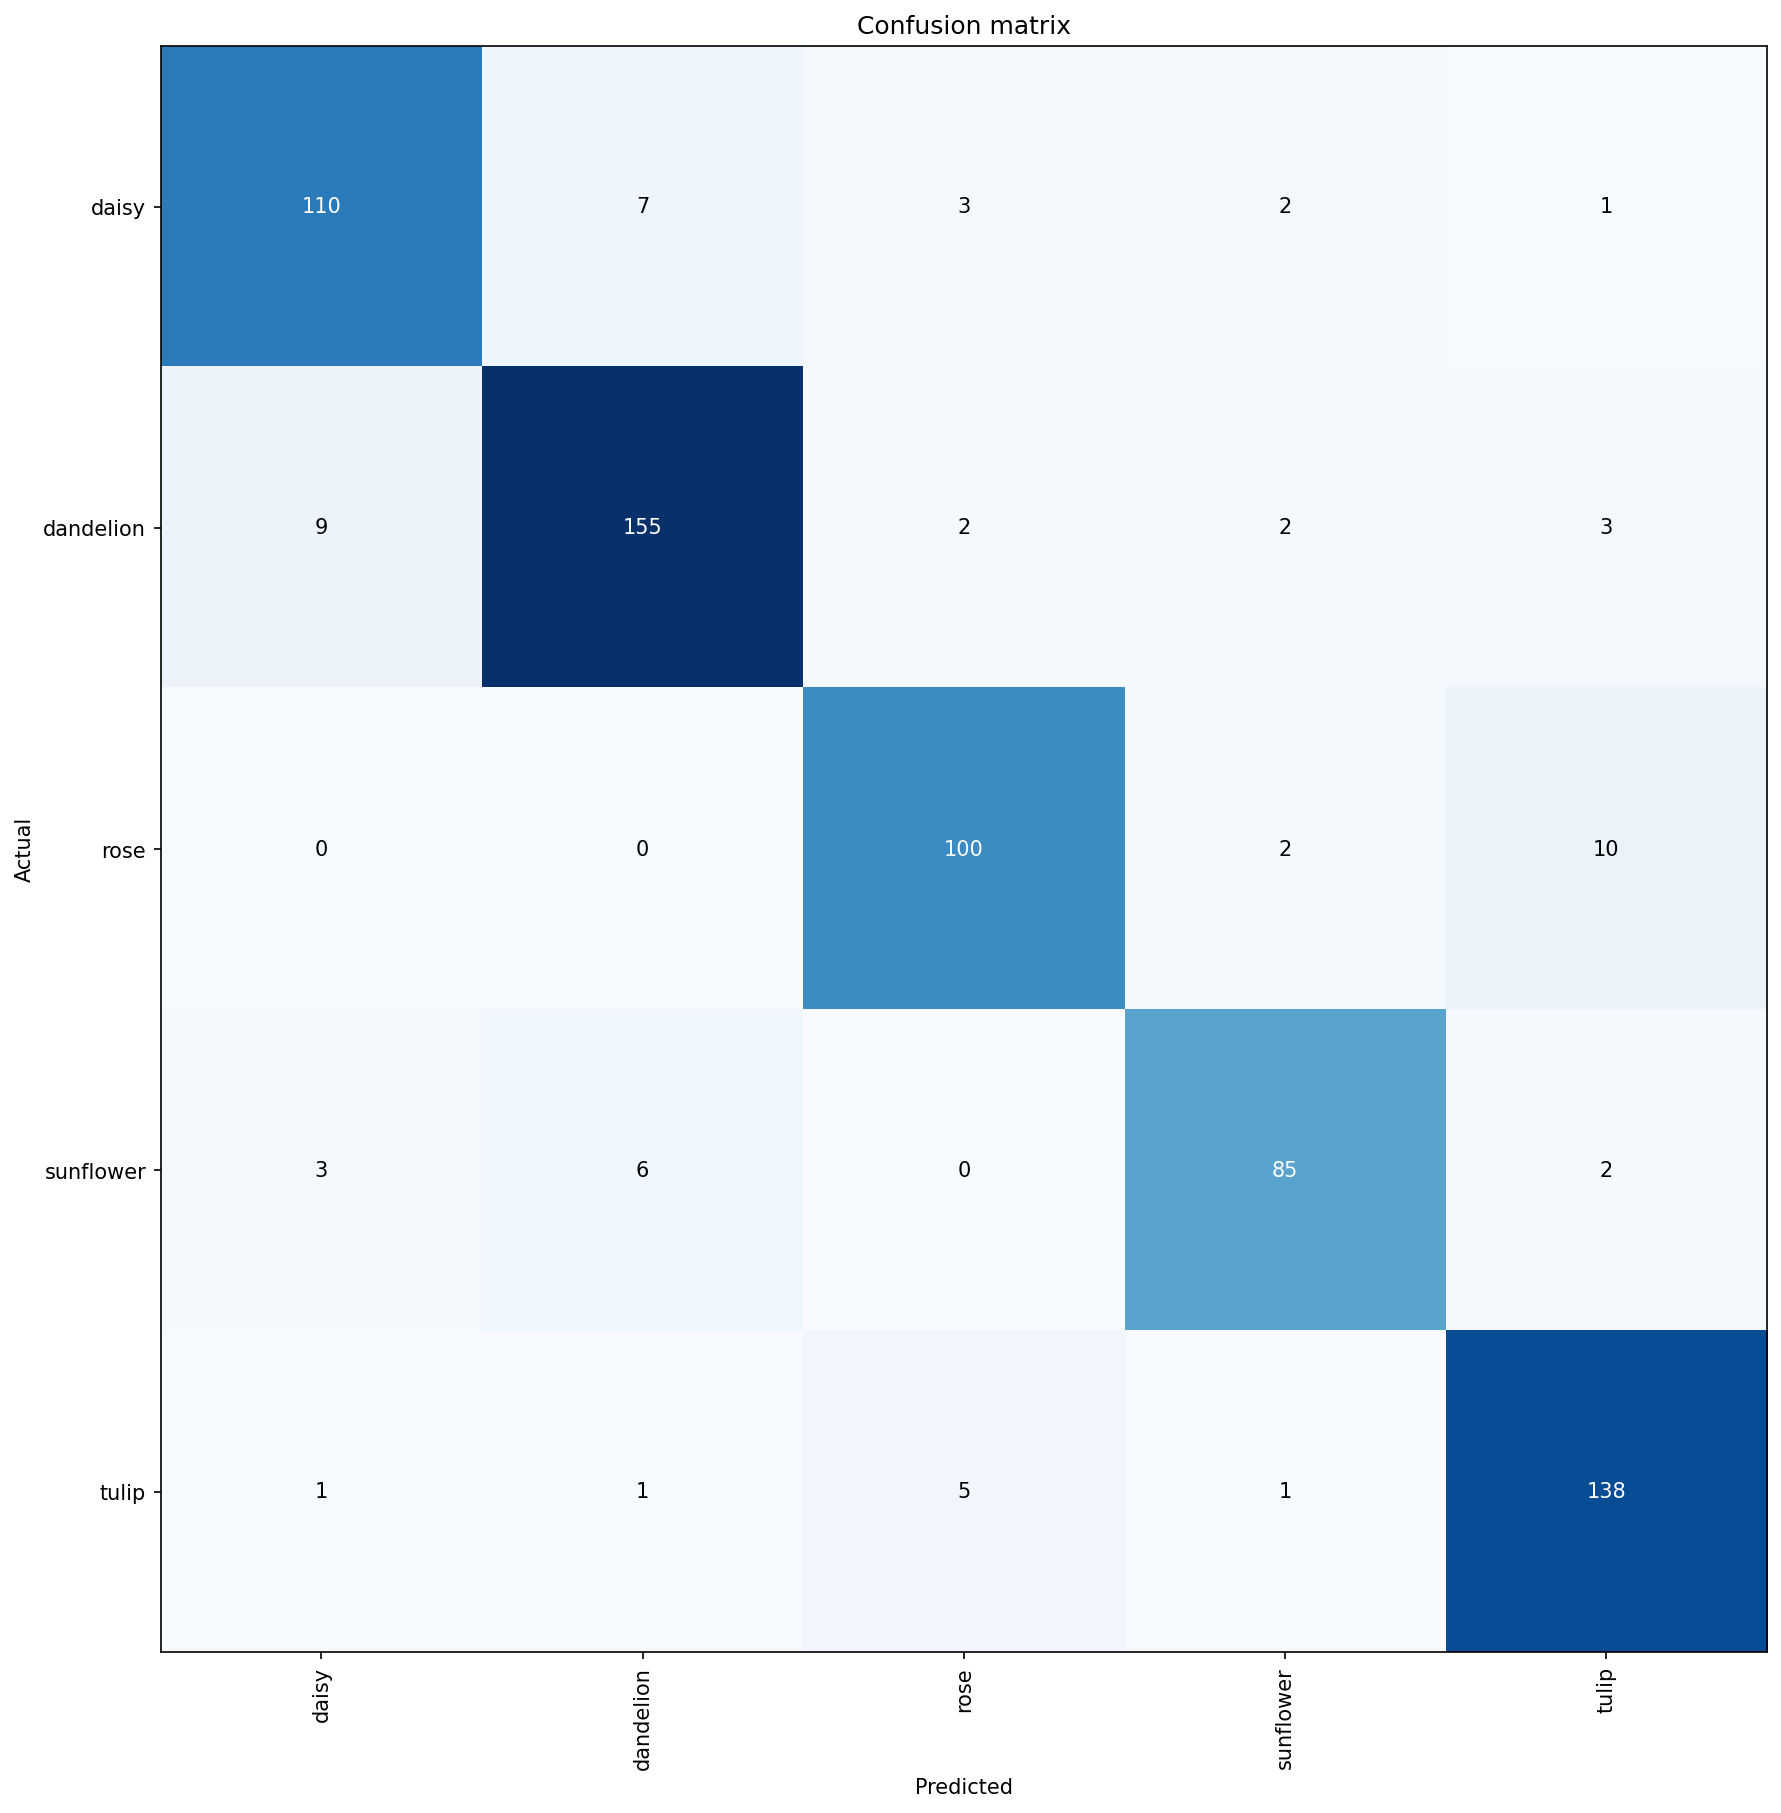

In [21]:
interpretation.plot_confusion_matrix(figsize = (12,12),dpi=150)

In [22]:
interpretation.most_confused(min_val = 2)

[('rose', 'tulip', 10),
 ('dandelion', 'daisy', 9),
 ('daisy', 'dandelion', 7),
 ('sunflower', 'dandelion', 6),
 ('tulip', 'rose', 5),
 ('daisy', 'rose', 3),
 ('dandelion', 'tulip', 3),
 ('sunflower', 'daisy', 3),
 ('daisy', 'sunflower', 2),
 ('dandelion', 'rose', 2),
 ('dandelion', 'sunflower', 2),
 ('rose', 'sunflower', 2),
 ('sunflower', 'tulip', 2)]

In [23]:
interp = Interpretation.from_learner(model)

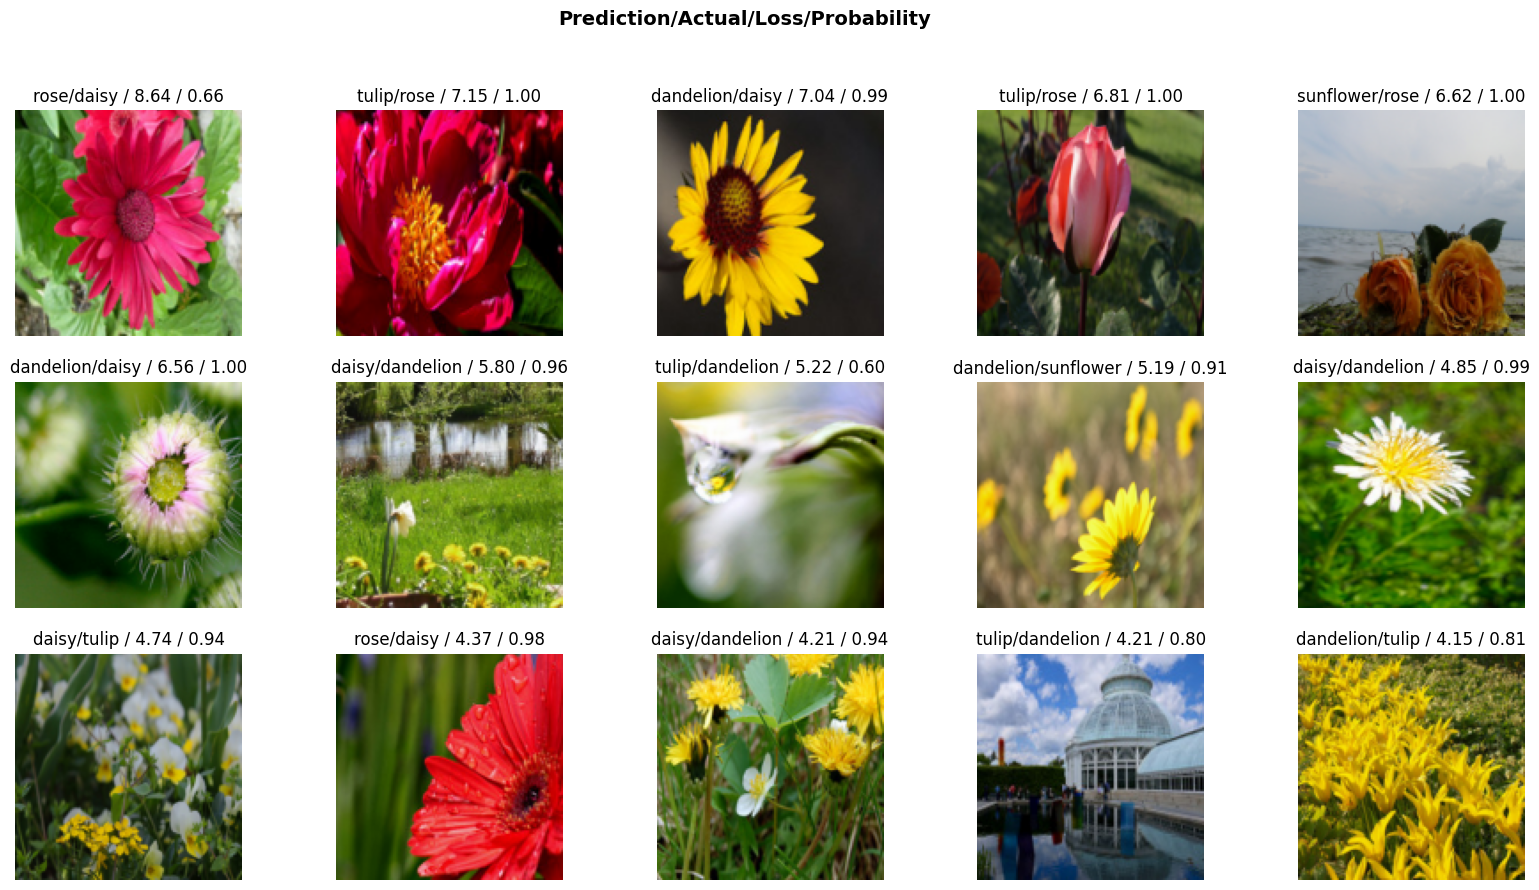

In [26]:
interp.plot_top_losses(k = 15,figsize = (20,10))